# Introduction to Neural Networks

In this workshop we provide a very short introduction to neural networks in Python. This is very far from a comprehensive coverage of the topic but can provide a quick start for those who wish to learn more about the topic in their own time. We will cover a classification and a regression taks using `keras` as our python package of choice. If you want to try and implement a NN from scratch there are several good online tutorials that can help you do so (see [here](https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6) for example). 


## Biological inspiration
The (for our purpose) smallest stand-alone element in the human brain is the neuron. Its understanding and computational recreation build the foundation for ANNs. A simplified image of a "real" neuron can be seen below

![](bio_neuron.png)

Dendrites are connecting to the axons (or "outputs") of other neurons, for instance nerves in the sensory system or other processing neurons. In the nucleus, these input signals are aggregated and forwarded through the axon. The axon terminals then connect to further neurons to build the neural network. The connection between axon terminal and dendrite is what we are calling a synapse. In the human brain, there are billions of neurons and $10^{14} - 10^{15}$ synapses in the human brain. If each synapse (or more precisely, its connection strength) would be represented by 8 bits or one byte, just storing these numbers would take 1000 TB already. 

## Computational implementation
To recreate neural networks artificially, neurons have to be defined. The common mathematical model used for this purpose is depicted below.

![](math_neuron.jpeg)

From a certain number of input synapses $x_i$, signals come in with a weight factor of $w_i$. This represents the strength of the synapse. In the _nuclues_ these weighted inputs are aggregated and a bias is added. (The bias is not shown in every model, but it does make the neural network more generalizable). After adding of the weighted inputs and the bias, everything is fed into a (non-linear) activation function. The output is then either fed forward to further neurons or is the output of your neural network. If there is only one neuron that takes direct inputs and whose output is your interest, the model is called a single-layer perceptron. Many of these neurons can create almost arbitrary logical connections and functions, making ANNs very powerful. In this case, we are talking about a multi-layer perceptron (MLP) model. 

![](mlp-network.png)

### Activation Function
The activation function is (to some degree) the hear of the neural network. Without a non-linear activation function, all hidden layers do not add any value, but are instead a complicated way to represent a liner model. Only with a non-linear activation function, ANNs can recreate non-linear hypothesis functions. In the beginning of research on the ANNs in the scope of AI, typically a unit step was used as activation function. The unit step is $0$ for inputs smaller than $0$ and $1$ otherwise. The idea behind this is to recreate the behavior of a biological neuron that _fires_ if a certain threshold of inputs is exceeded. Today, other activation functions are more typically used. This is linked to better mathematical qualities in terms of learning behavior and convergence. Some of the most popular activation functions are:

Sigmoid: $\sigma(z) = \frac{1}{1+exp(-z)}$

Hyperbolic tangent: $\sigma(z) = \frac{2}{1+exp(-2z)} -1 $

ReLU (Rectified Linear Unit): $\sigma(z) = z\quad  for\ z>0,\ 0\ otherwise$

### Learning
As learning of ANNs is a non-trivial mathematical task, we are only aiming for an intuitive understanding here. Let's have a look at our complete MLP first.

The general learning tasks consists of two steps, which are repeated until the algorithm converges:
1. __Feedforward: Calculating the predicted output ŷ and the associated loss__. At first, we randomly assign values for the weights (and the biases). Based on the input features, the output value is calculated.
2. __Backpropagation: Updating the weights W and biases b__. If the output value and the target value differ, the weights and biases are updated. To do this, it is calculated how much each weight and bias contributes to the error. Proportionally to this, they are then corrected (scaled with a small learning factor). In this sense, the updating rule has some similarity to gradient descent, only that is is propagated through the entire network, which is why this algorithm is called backpropagation.

The training routine for a simple 2-layered MLP is shown in the below figure:

![](training.png)

### Hyperparameters
The main hyperparameters of an MLP are: 

1. Number of hidden layers
1. Number of nodes
4. Activation function

The number of hidden layers and number of nodes (its activation function could be understood as a hyperparameter, but that is typically not done). The more layers and nodes there are (and the denser the network is, i.e. the more edges have a non-zero weight) the harder it gets to learn the model. That's the reason why bigger ANNs are normally not trained on a local computer anymore, but on specialized computers. Furthermore, there are additional libraries for python to improve the efficiency of ANNs, e.g. TensorFlow or Keras, which we take a first look at in today's tutorial


# `Keras`

`Keras` is one of the most popular Deep Learning libraries. `PyTorch`, `PyTorch` and `Jax` are the most used numerical platforms in Python to build Deep Learning algorithms but they can be quite complex and difficult to use.

Keras, by contrast is easy to use and is capable of running on top of multiple low-level tensor operation frameworks. The full documentation of the keras API can be found [here](https://keras.io).

Note that `scikit learn` also features an MLP implementation (see [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)). Yet, `keras` has advanced to be one of the most popular frameworks used in practice, which is why we focus on it in this short tutorial.


We use `Keras` to command `PyTorch`, therefore we need to install both.
PyTorch's installation method varies by platform and environment manager, all of the options are listed here: https://pytorch.org/get-started/locally/

If you use the provided `environment.yml` specification, you can just recreate your environment.

## Neural networks for classification in `keras`

To stay with our example, we will build a NN that predicts the class of a breast cancer by categorizing it as either malignant or begnign. 

In [1]:
# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# supress versioning warnings of keras
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


Because keras can work with multiple different backends, it is important to specify that we want to use PyTorch before importing keras for the first time:

In [2]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [3]:
import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout

__Data Preparation__

In [4]:
# Load data

cancer_df = pd.read_csv("../data/breast_cancer.csv", index_col = "id")
cancer_df.head(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
# define x and Y
X = cancer_df.iloc[:,1:31] # include full feature vector
y = cancer_df["diagnosis"]


# encode categorical target verctor
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [6]:
# Conduct train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Normalize the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

__Initializing and Training the ANN__

We start by defining the type of model we want to build. There are two types of models available in Keras: the [Sequential model](https://keras.io/models/sequential/) and the Model class used with [functional API](https://keras.io/models/model/). Then we simply add the input-, 2 hidden- and output-layers.

Between them, we are using [dropout](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer) to prevent overfitting (dropout rate should be between 20% and 50%).

![](dropout.png)

At every layer, we use “Dense” which means that the nodes are fully connected.

The input-layer takes 30 inputs (because our feature vector includes 30 features) as input and outputs it with a shape of 16, which is the number of nodes in the first hidden layer that we define.

In [8]:
# initialize the ANN
classifier = Sequential()

We need to pass the following parameters:

- input_shape - number of columns of the dataset (only for input layer)

- units - number of neurons and dimensionality of outputs to be fed to the next layer, if any

- activation - activation function which is ReLU in this case


In [9]:
# adding the input layer and the first hidden layer (with 30 nodes)
classifier.add(Dense(input_shape = (30,), 
                     units=30,          #dimensionality of the output space (#nodes in the first hidden layer)
                     activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

We add an additional second layer, also with 15 nodes.

In [10]:
# Adding the second hidden layer
classifier.add(Dense(units= 15,
                     activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.2))

Finally we add the output layer. Since we perform a binary classification, a single output node suffices. We use a sigmoidal activation function for this last node which is often used when dealing with binary classfication problems.

In [11]:
# Adding the output layer
classifier.add(Dense(units= 1, activation='sigmoid'))

First we compile the model to configure it for training. We add the following parameters:
- `optimizer`: Here we use the adam optimizer, an optimizer with higher performance in many cases than stochastic gradient descent (SGD). See [here](https://keras.io/optimizers/) for a list of all optimzers implemented in `keras`.
- `loss`: specifies the loss to be minimized. In this example we use binary crossentropy, a common loss for binary classification tasks. See [here](https://keras.io/losses/) for an overview of available losses in keras 
- `metrics`:  metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model and merely function as indicator of model performance to the data scientist. An overview ov available metrics can be found [here](https://keras.io/metrics/).

In [12]:
# Compiling the ANN
classifier.compile(optimizer="adam",    # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
              loss="binary_crossentropy",  # this is a good loss for binary classification
              metrics=["accuracy"])

In [13]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)                │        930 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 30)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 15)                │        465 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_1 (Dropout)             │ (None, 15)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 1)                 │         16 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

We are now able to train our model. We do this with a batch_size of 50 and for 100 epochs.

- `batch_size` defines the number of samples that will be propagated through the network 
- `epoch` defines the number of iteration over the entire training data

In general a larger batch-size results in faster training, but does not always converge fast. A smaller batch-size is slower in training but it can converge faster. This is definitely problem dependent and you need to try out a few different values (the standard batch-size is 32). The same goes for the number of epochs.

In [14]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3721 - loss: 1.0199 
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3916 - loss: 0.8639 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5611 - loss: 0.6582
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6945 - loss: 0.5549
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7564 - loss: 0.4983
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7998 - loss: 0.4201 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8708 - loss: 0.3815
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8823 - loss: 0.3348
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9262 - loss: 0.2925
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9193 - loss: 0.2499
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2405
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9573 - loss: 0.190

In [15]:
# Report classification performance on test set

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

confusion_matrix = confusion_matrix(y_test, classifier.predict(X_test).round(decimals=0).astype(int))
accuracy_score = accuracy_score(y_test, classifier.predict(X_test).round(decimals=0).astype(int))
precision_score = precision_score(y_test, classifier.predict(X_test).round(decimals=0).astype(int))

print("Confusion Matrix")
print(confusion_matrix)
print()
print("Accuracy")
print(round(accuracy_score, ndigits=4))
print()
print("Precision")
print(round(precision_score, ndigits=4))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix
[[107   1]
 [  1  62]]

Accuracy
0.9883

Precision
0.9841


## Neural networks for regression in `keras`

Neural networks can also be trained for regression tasks. The logic is exactly the same, yet some of the parameters, such as loss, metrics, input and ouput as well as typical activation functions might have to be adapted to the specific case. There are a range of very good tutorial online which we encourage you to take a look at (for example [here](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/)). 

We will cover a simple implimentation on the `Diamonds` dataset. The objective in this task is to predict the price of a particular dimond based on different features.

In [16]:
diamonds = sns.load_dataset('diamonds')
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
33030,0.30,Ideal,D,VVS2,62.2,55.0,814,4.32,4.33,2.69
12781,1.03,Premium,F,VS2,60.5,59.0,5330,6.60,6.52,3.97
27894,0.32,Ideal,I,IF,61.7,55.0,655,4.40,4.42,2.72
23538,2.00,Premium,G,SI2,61.4,59.0,11544,8.14,8.06,4.97
49426,0.70,Very Good,H,SI1,62.7,56.0,2107,5.60,5.62,3.52


In [17]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


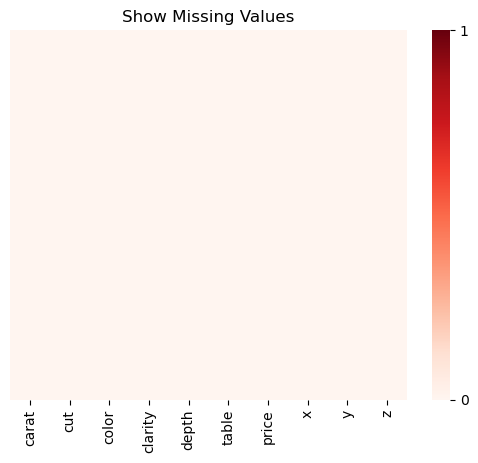

In [18]:
fig, ax = plt.subplots(1,1)
sns.heatmap(diamonds.isna(), ax=ax,
           vmin=0, vmax=1, cmap="Reds",
           cbar_kws={"ticks":[0,1]})
ax.set_yticks([])
ax.set_title("Show Missing Values")
plt.show()

### Creating Dummy variables

Since in the diamond dataset we have three categorical input features, we need to convert them into dummy variables

In [19]:
diamonds = pd.get_dummies(diamonds)
diamonds.sample(5)

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
30953,0.32,62.5,55.0,449,4.38,4.39,2.74,True,False,False,...,True,False,False,False,False,False,True,False,False,False
8822,1.02,64.3,58.0,4478,6.36,6.26,4.06,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5038,0.90,63.8,56.0,3750,5.99,5.92,3.80,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5775,1.18,57.0,66.0,3899,6.96,6.91,3.98,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34137,0.32,61.6,55.0,854,4.42,4.44,2.73,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [20]:
# Defining inputs and output

X = diamonds.drop("price", axis=1)
y = diamonds["price"]

In [21]:
# Splitting into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
# Normalizing training data

st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_scaled = st_scaler.transform(X_train)

### Initializing the ANN

In [23]:
model = Sequential(
    [Dense(36, activation="relu", input_shape=[X_train.shape[1]]),
    Dense(36, activation="relu"),
     Dense(1)])

In [24]:
# Compiling the ANN

model.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 36)                │        972 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 36)                │      1,332 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_5 (Dense)                 │ (None, 1)                 │         37 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 2,341 (9.14 KB)

 Trainable params: 2,341 (9.14 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
epochs = 20

history = model.fit(X_train_scaled, y_train.values,
                   epochs=epochs, validation_split=0.2)

Epoch 1/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27076464.0000 - mae: 3594.2483 - mse: 27076464.0000 - val_loss: 4394482.5000 - val_mae: 1434.9344 - val_mse: 4394482.5000
Epoch 2/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3014568.0000 - mae: 1177.3313 - mse: 3014568.0000 - val_loss: 1325070.2500 - val_mae: 769.5203 - val_mse: 1325070.2500
Epoch 3/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1242632.5000 - mae: 714.6309 - mse: 1242632.5000 - val_loss: 945247.4375 - val_mae: 633.0067 - val_mse: 945247.4375
Epoch 4/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 876635.1250 - mae: 608.2714 - mse: 876635.1250 - val_loss: 861656.6875 - val_mae: 593.0989 - val_mse: 861656.6875
Epoch 5/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 804166.3750 - mae: 582.2291 - mse: 804166.3750 - val_loss: 814066.8750 - val_mae: 567.4042 - val_mse: 814066.8750
Epoch 6/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 771727.0625 - mae: 550.0146 - mse: 771727.0625 - val_lo

In [31]:
model.predict(X_train_scaled[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[  892.75525],
       [ 7562.17   ],
       [ 8348.039  ],
       [  485.27863],
       [11501.449  ],
       [  777.29645],
       [  463.85168],
       [  718.2058 ],
       [ 5766.06   ],
       [ 2599.5518 ]], dtype=float32)

In [32]:
history_df = pd.DataFrame(history.history)
history_df

,loss,mae,mse,val_loss,val_mae,val_mse
0,1.931869e+07,2911.954102,1.931869e+07,4.394482e+06,1434.934448,4.394482e+06
1,2.265784e+06,1009.736389,2.265784e+06,1.325070e+06,769.520264,1.325070e+06
2,1.153404e+06,679.645874,1.153404e+06,9.452474e+05,633.006714,9.452474e+05
3,9.698622e+05,604.564270,9.698622e+05,8.616567e+05,593.098938,8.616567e+05
4,9.013253e+05,571.144836,9.013253e+05,8.140669e+05,567.404236,8.140669e+05
5,8.522059e+05,542.170044,8.522059e+05,7.751791e+05,534.728882,7.751791e+05
6,8.054150e+05,510.084198,8.054150e+05,7.288255e+05,506.313232,7.288255e+05
7,7.620054e+05,482.506683,7.620054e+05,6.863399e+05,478.248535,6.863399e+05
8,7.223342e+05,456.559692,7.223342e+05,6.553146e+05,453.572510,6.553146e+05
9,6.859411e+05,434.525146,6.859411e+05,6.223377e+05,437.477753,6.223377e+05


In [33]:
root_metrics_df = history_df[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,4395.303175,2096.302101
1,1505.251972,1151.116958
2,1073.966422,972.238365
3,984.815846,928.254646
4,949.381542,902.256546
5,923.149974,880.442538
6,897.449163,853.712774
7,872.929192,828.456321
8,849.902458,809.515017
9,828.215627,788.883824


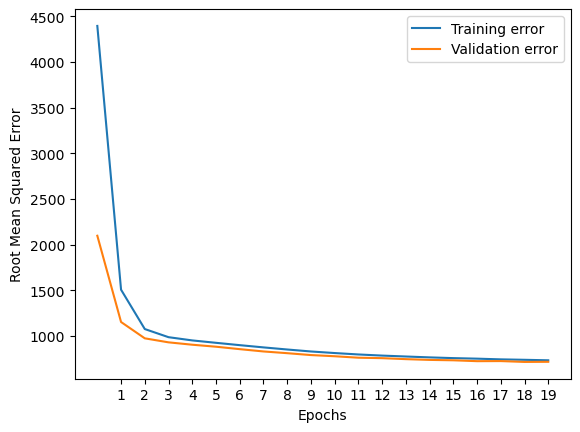

In [34]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [35]:
# Prediction on test set

X_test_scaled = st_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

506/506 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step


In [36]:
# Report regression performance on test set

from sklearn.metrics import mean_squared_error, mean_absolute_error


print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ", mean_absolute_error(y_test, y_pred))

RMSE:  814.6149823818807
MAE:  361.97749172178163


---

**Exercise:** In this workshop notebook, you learned how to use the keras framework for both classifcation and regression prediction. The classification example above was for a binary output (cancer cells being benign or malignant). Now we would like to employ neural network for multi-class classification on the flower example.

1. Use the `../data/iris.csv` data set and preproccess it as usual
2. Think of an architecture you would employ to enable multi-class classification. You can get some inspiration here: https://keras.io/guides/sequential_model/
3. Implement a pipeline that consists of the following:
    1. Train the model on training data set
    3. Evaluate and visualize loss on training and validation set throughout the fitting of the network
    4. [optional] Visualize classification along relevant dimensions
4. Use that pipeline to test different architectures / hyperparameters
5. Give a reasoning for complexity vs. performance of your final model - is this the best overall model?

In [103]:
from keras.utils import to_categorical

In [118]:
# 1) load and preprocess data
iris = pd.read_csv('../data/iris.csv')
iris.dropna(inplace=True)

X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

# encode categorical target vector
y = LabelEncoder().fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2) create NN model using Keras Sequential API
model = Sequential()
model.add(keras.Input((4,))) # input is dimensionality of X
model.add(keras.layers.Dense(64, activation=None)) # linear combination
# model.add(keras.layers.Dropout(rate = 0.1)) # dropout
model.add(keras.layers.Dense(32, activation=None)) # Rectified Linear Unit activation function
# model.add(keras.layers.Dropout(rate = 0.1)) # dropout
model.add(keras.layers.Dense(3, activation='softmax')) # Output layer with one node per output class

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [119]:
# 3) train and evaluate
def train_and_evaluate(model, visualize=False):
    history = model.fit(X_train, y_train, batch_size = 20, epochs = 20, validation_split=0.4)
    if visualize:
        pd.DataFrame(history.history).plot()

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4220 - loss: 1.1002 - val_accuracy: 0.6222 - val_loss: 1.0443
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7478 - loss: 0.8021 - val_accuracy: 0.6222 - val_loss: 0.8254
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7345 - loss: 0.6404 - val_accuracy: 0.6444 - val_loss: 0.6660
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7438 - loss: 0.5552 - val_accuracy: 0.7333 - val_loss: 0.5671
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8084 - loss: 0.4609 - val_accuracy: 0.7778 - val_loss: 0.5053
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8543 - loss: 0.4277 - val_accuracy: 0.7556 - val_loss: 0.4693
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8377 - loss: 0.4031 - val_accuracy: 0.7333 - val_loss: 0.4492
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8643 - loss: 0.3795 - val_accuracy: 0.7333 - val_loss: 0.4357
Epoch 9

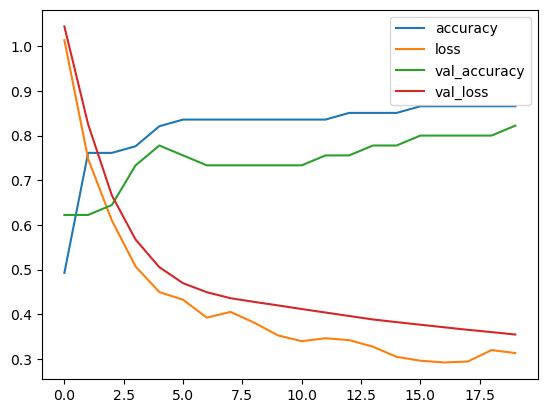

In [120]:
train_and_evaluate(model, True)

This are results that we can easily achieve with a SVM or Logistic Regression!
Remember that the data set is (before filtering out NaN) just 50 records of every class (species), this is a really small data set and there is really no reason to opt for a neural network here!
This is an important lesson, even though this small NN is fast to build and fit, it is

1. inefficient to use a large network for the task
1. unnecessary to introduce an opaque method, where we have to idea about e.g. feature importance!